In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.drop(['total_bill', 'tip'], axis =1, inplace = True)
tips.head()

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4


In [13]:
tips=tips.drop(columns=['size'])
tips.tail()

,sex,smoker,day,time
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner
243,Female,No,Thur,Dinner


In [17]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [19]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [14]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(tips)
tips_mca = mca.transform(tips)
tips_mca.head()

,0,1
0,-0.217659,-0.499252
1,-0.503630,-0.702641
2,-0.503630,-0.702641
3,-0.503630,-0.702641
4,-0.217659,-0.499252


Al interior de los ejes factoriales se ubican la nube de individuos y la de categorías.
Este gràfico permite describir el espacio de los clientes generados por estas cuatro variables.
Los datos son transformados internamente de manera que se construye una tabla disyuntiva en la que las columnas están asociadas a las diferentes categorías de cada variable.
Luego se construye una Tabla de Burt que basicamente es una matriz compuesta por sub tablas de contingencia y sobre ella se aplica una reducción de dimensionalidad.

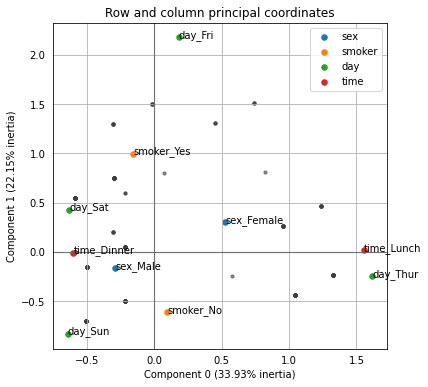

In [15]:
_=mca.plot_coordinates(X = tips, show_column_labels=True,)

In [25]:
pd.pivot_table(data=tips, values='day',index='sex', columns='time', aggfunc='count', margins=True)

time,Lunch,Dinner,All
sex,,,
Male,33,124,157
Female,35,52,87
All,68,176,244


In [26]:
pd.pivot_table(data=tips, values='time',index='sex', columns='day', aggfunc='count', margins=True)

day,Thur,Fri,Sat,Sun,All
sex,,,,,
Male,30,10,59,58,157
Female,32,9,28,18,87
All,62,19,87,76,244
